In [14]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the src directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(""), '..', 'src')))

from data_loader import load_news_data
from eda_news import headline_lengths, publisher_counts, publication_trends, extract_domains

# Plot settings
sns.set(style="whitegrid")
%matplotlib inline


In [15]:
#loading dataset
file_path = "../Data/raw_analyst_ratings.csv"

try:
    df = load_news_data(file_path)
    print("Data loaded successfully. Shape:", df.shape)
except Exception as e:
    print(f"Error loading data: {e}")


/home/nurye/Desktop/10_Academy/week_1/sentiment-stock-predictor-for-nova-insights-PLLC/src/data_loader.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(filepath, parse_dates=['date'], infer_datetime_format=True)


Data loaded successfully. Shape: (1407328, 6)


In [16]:
#add headline lengths
df = headline_lengths(df)
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

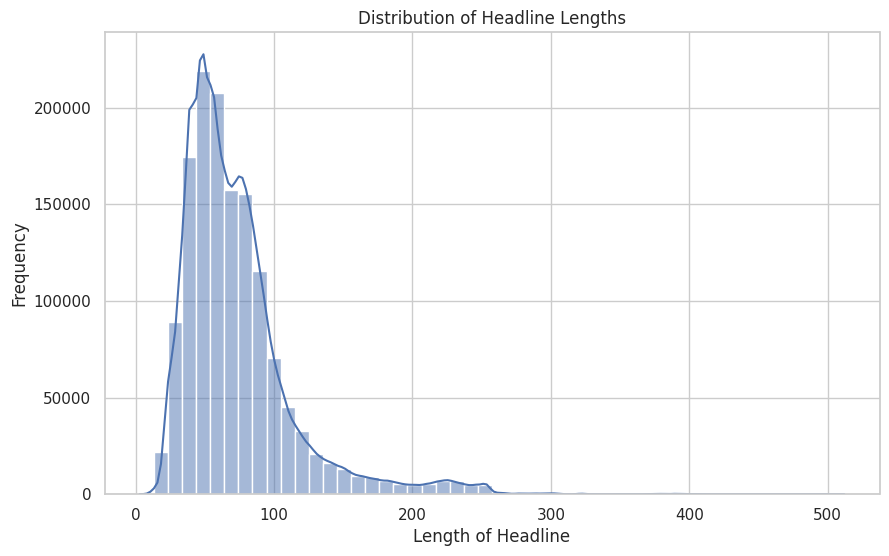

In [17]:
# Plot Headline Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Length of Headline")
plt.ylabel("Frequency")
plt.show()



In [18]:
#Publisher Counts
publisher_freq = publisher_counts(df)
publisher_freq.head(10)



publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

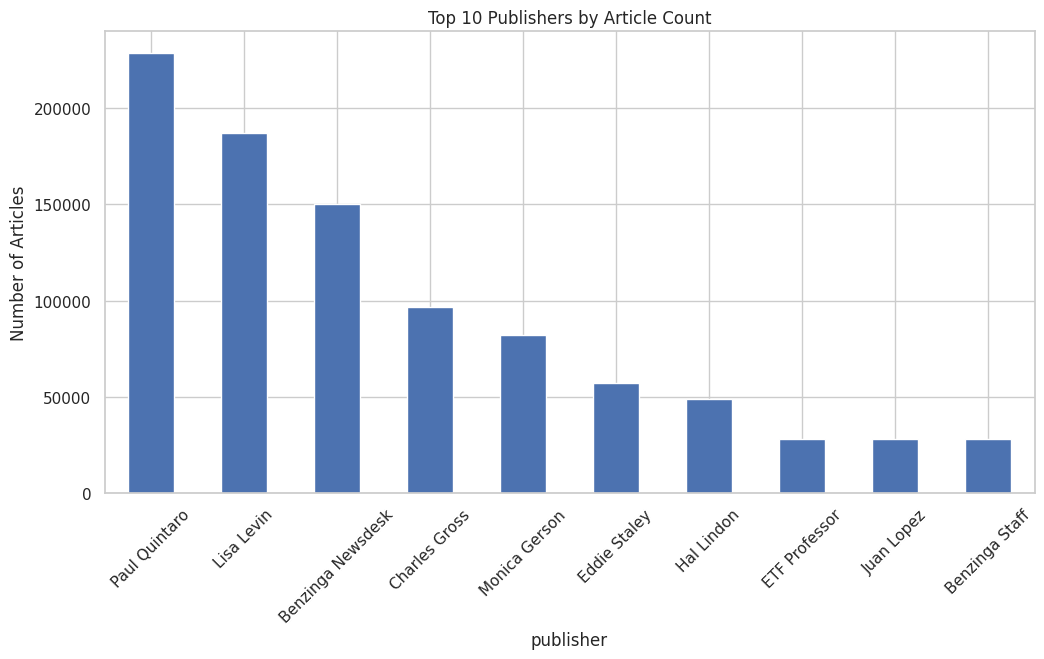

In [19]:
# Top Publishers Plot
plt.figure(figsize=(12, 6))
publisher_freq.head(10).plot(kind='bar')
plt.title("Top 10 Publishers by Article Count")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Check column names
print("Columns:", df.columns)

# Confirm data type
print("Date column dtype:", df['date'].dtype)

# Convert to datetime safely if needed
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # convert or set NaT for bad formats

# Check how many rows failed to convert
print("Rows with missing dates after conversion:", df['date'].isna().sum())


Columns: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length'],
      dtype='object')
Date column dtype: object
Rows with missing dates after conversion: 1351341


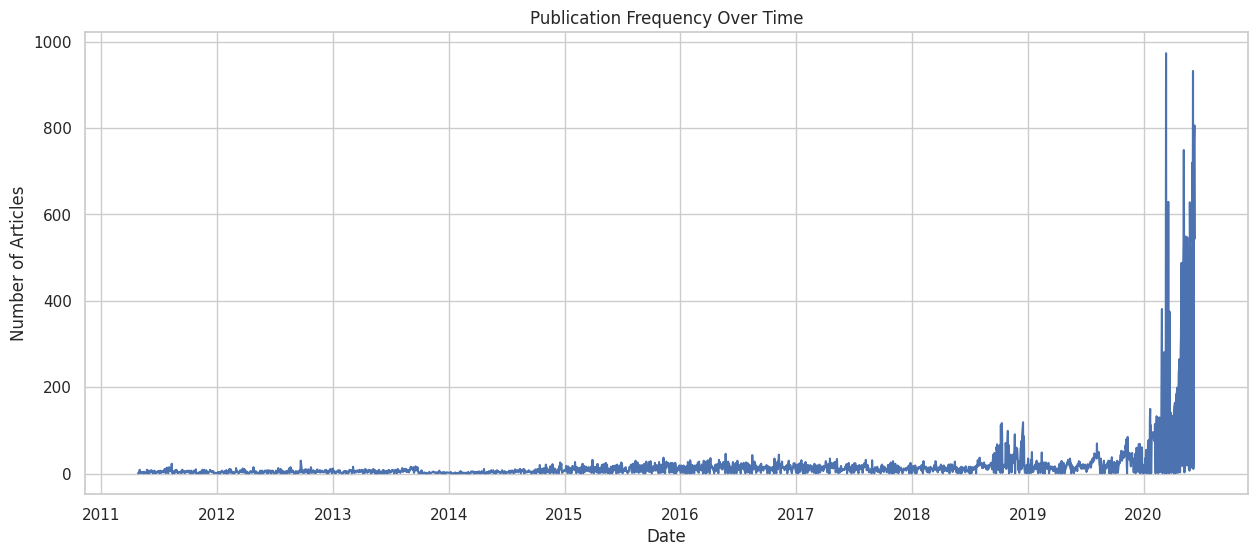

In [22]:
# Cell 7: Publication Trends Over Time
df['date_only'] = df['date'].dt.date
pub_trend = publication_trends(df)

plt.figure(figsize=(15, 6))
pub_trend.plot()
plt.title("Publication Frequency Over Time")
plt.ylabel("Number of Articles")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In [ ]:
# Domain Extraction
df = extract_domains(df)
domain_counts = df['domain'].value_counts().head(10)
print("Top Email Domains (if available):")
print(domain_counts)


Top Email Domains (if available):
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [24]:
# Save Preprocessed File
df.to_csv("../Data/preprocessed_news.csv", index=False)
print("Saved preprocessed news data.")


Saved preprocessed news data.
